<a href="https://colab.research.google.com/github/JuanZapa7a/Medical-Image-Processing/blob/main/figs/NB4-05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargar el dataset

In [1]:
# Importa la biblioteca TensorFlow
import tensorflow as tf
# Importa el módulo pathlib para manejar rutas de archivos
import pathlib
# Importa el módulo os
import os

# Define la URL donde se encuentra el dataset
dataset_url = 'https://data.lhncbc.nlm.nih.gov/public/Malaria/cell_images.zip'

data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='cell_images.zip', extract=False)

# Convierte la ruta del archivo descargado (que es una cadena) en un objeto `Path` de pathlib.
data_dir = pathlib.Path(data_dir)

353452851/353452851 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


# Extraer dataset

In [2]:
import zipfile

# Define la ruta del directorio
malaria_dir = pathlib.Path('/content/datasets/malaria')

# Aseguramos que el directorio de malaria existe
malaria_dir.mkdir(parents=True, exist_ok=True)

# Extrae el archivo zip en el directorio especificado
with zipfile.ZipFile(data_dir, 'r') as zip_ref:
    zip_ref.extractall(malaria_dir)

# Verifica la extracción
print(f'Extracted files to {malaria_dir}')

Extracted files to /content/datasets/malaria


# Inspeccionar dataset

In [3]:
from pathlib import Path

def print_directory_tree(root_dir, level=0):
    """
    Recursively prints the directory tree structure, only listing directories.
    """
    prefix = " " * (level * 4) + "|-- " if level > 0 else ""
    print(prefix + root_dir.name)

    if root_dir.is_dir():
        for item in root_dir.iterdir():
            if item.is_dir():
                print_directory_tree(item, level + 1)

# Define the data directory
data_dir = Path('/content/datasets/malaria/cell_images')

# Print the directory tree
print_directory_tree(data_dir)

cell_images
    |-- Parasitized
    |-- Uninfected


## Enseñar una imagen de cada directorio

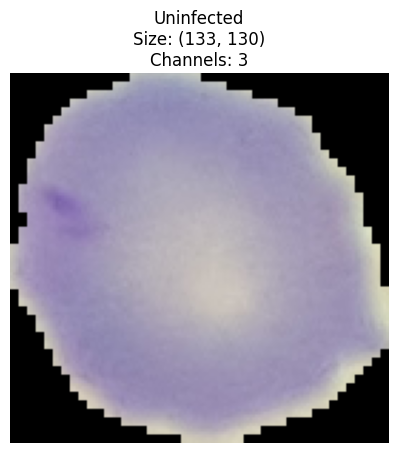

Uninfected Image: C149P110ThinF_IMG_20151115_114555_cell_195.png
Size: (133, 130)
Channels: 3


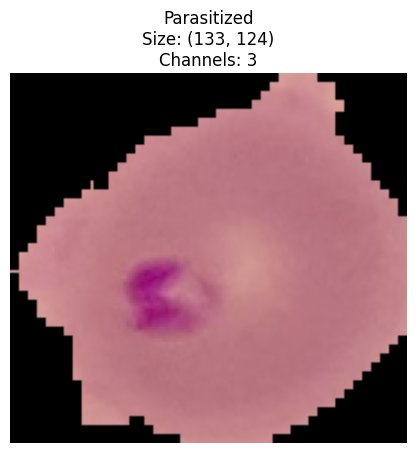

Parasitized Image: C80P41ThinF_IMG_20150817_111943_cell_1.png
Size: (133, 124)
Channels: 3


In [4]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define el directorio
data_dir = '/content/datasets/malaria/cell_images'

# Sacar una imagen por directorio
uninfected_image_dir = os.path.join(data_dir, 'Uninfected')
parasitized_image_dir = os.path.join(data_dir, 'Parasitized')

# List files in each directory
uninfected_images = [f for f in os.listdir(uninfected_image_dir) if f.endswith('.png')]
parasitized_images = [f for f in os.listdir(parasitized_image_dir) if f.endswith('.png')]

# Get the first image from each category
uninfected_image_path = os.path.join(uninfected_image_dir, uninfected_images[0])
parasitized_image_path = os.path.join(parasitized_image_dir, parasitized_images[0])

# Open and display the Uninfected image
uninfected_image = Image.open(uninfected_image_path)
plt.imshow(uninfected_image)
plt.axis('off')
plt.title(f'Uninfected\nSize: {uninfected_image.size}\nChannels: {len(uninfected_image.getbands())}')
plt.show()

# Print Uninfected image details
print(f'Uninfected Image: {os.path.basename(uninfected_image_path)}')
print(f'Size: {uninfected_image.size}')
print(f'Channels: {len(uninfected_image.getbands())}')

# Open and display the Parasitized image
parasitized_image = Image.open(parasitized_image_path)
plt.imshow(parasitized_image)
plt.axis('off')
plt.title(f'Parasitized\nSize: {parasitized_image.size}\nChannels: {len(parasitized_image.getbands())}')
plt.show()

# Print Parasitized image details
print(f'Parasitized Image: {os.path.basename(parasitized_image_path)}')
print(f'Size: {parasitized_image.size}')
print(f'Channels: {len(parasitized_image.getbands())}')

## Enseñar imágenes de ambos directorios

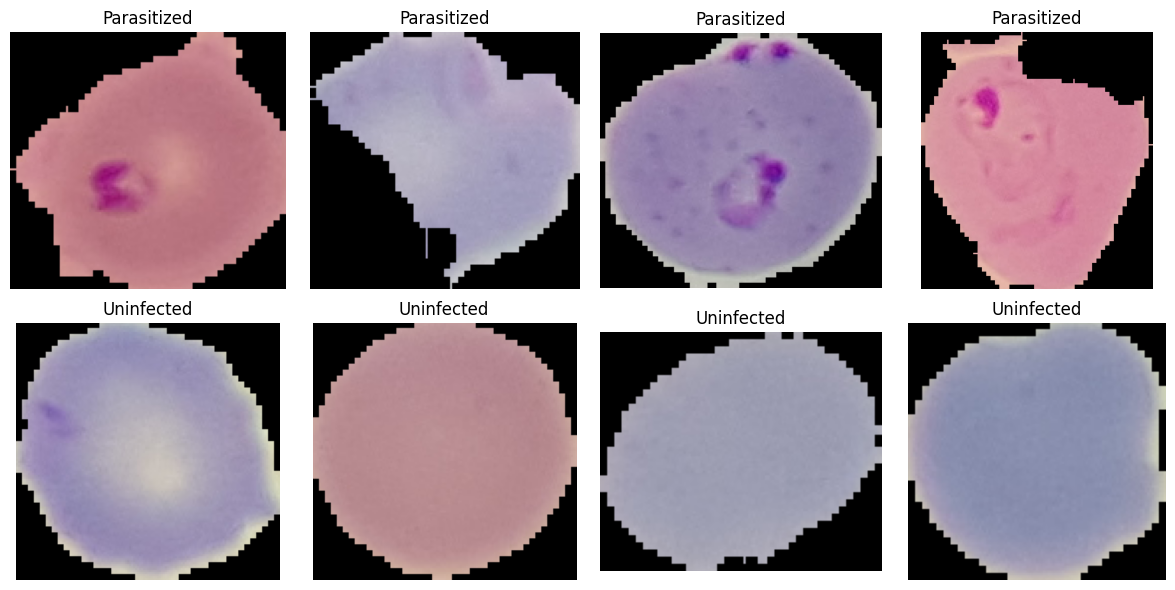

In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define the data directory
data_dir = '/content/datasets/malaria/cell_images'

# Define the number of images to display from each class
num_images_per_class = 4

# Define the paths to the image directories
parasitized_dir = os.path.join(data_dir, 'Parasitized')
uninfected_dir = os.path.join(data_dir, 'Uninfected')

# Get the list of images in each directory
parasitized_images = os.listdir(parasitized_dir)[:num_images_per_class]
uninfected_images = os.listdir(uninfected_dir)[:num_images_per_class]

# Display Parasitized images
plt.figure(figsize=(12, 6))
for i, image_name in enumerate(parasitized_images):
    img_path = os.path.join(parasitized_dir, image_name)
    img = mpimg.imread(img_path)
    plt.subplot(2, 4, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Parasitized')

# Display Uninfected images
for i, image_name in enumerate(uninfected_images):
    img_path = os.path.join(uninfected_dir, image_name)
    img = mpimg.imread(img_path)
    plt.subplot(2, 4, i+5)
    plt.imshow(img)
    plt.axis('off')
    plt.title('Uninfected')
plt.tight_layout()
plt.show()

## Contar cantidad de imágenes en cada clase

In [6]:
# Define the data directory
data_dir = '/content/datasets/malaria/cell_images'

# Count the number of images in each subdirectory
parasitized_count = len(os.listdir(os.path.join(data_dir, 'Parasitized')))
uninfected_count = len(os.listdir(os.path.join(data_dir, 'Uninfected')))

# Print the counts
print(f'Parasitized: {parasitized_count} images')
print(f'Uninfected: {uninfected_count} images')

Parasitized: 13780 images
Uninfected: 13780 images


# Cargar el dataset

In [7]:
import tensorflow as tf

# Path to the main dataset directory
dataset_directory = "/content/datasets/malaria"

# Create the image dataset
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_directory,
    validation_split=0.2,       # Split the dataset into training and validation
    subset="training",          # Specify that this is the training subset
    seed=123,                   # Seed for randomization
    image_size=(256, 256),      # Size to resize images to
    batch_size=32               # Batch size
)

validation_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_directory,
    validation_split=0.2,       # Split the dataset into training and validation
    subset="validation",        # Specify that this is the validation subset
    seed=123,                   # Seed for randomization
    image_size=(256, 256),      # Size to resize images to
    batch_size=32               # Batch size
)

Found 27558 files belonging to 1 classes.
Using 22047 files for training.
Found 27558 files belonging to 1 classes.
Using 5511 files for validation.


## Training and test/val sets

In [8]:
import tensorflow as tf
import pathlib

# Define el directorio
data_dir = pathlib.Path('/content/datasets/malaria/cell_images')

# Cargar los datos del diresctorio
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,  # Split 80% for training and 20% for validation
    subset="training",
    seed=123,
    image_size=(64, 64),  # Resize images to 64x64
    batch_size=32,
)


val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(64, 64),
    batch_size=32
)

Found 27558 files belonging to 2 classes.
Using 22047 files for training.
Found 27558 files belonging to 2 classes.
Using 5511 files for validation.


## Obtener información del dataset

In [9]:
class_names = train_ds.class_names
print(f'Class names: {class_names}')

num_batches = len(train_ds)
print(f'Number of batches: {num_batches}')

for images, labels in train_ds.take(1):
    print(f'Batch shape: {images.shape}')
    print(f'Labels shape: {labels.shape}')

    image_shape = images.shape[1:]
    print(f'Image size: {image_shape[:2]}')
    print(f'Number of channels: {image_shape[2]}')

    print(f'Example label[0]: {labels[0].numpy()}')

    # Convert to numpy array for easier inspection
    images_array = images.numpy()

    # Print the range of pixel values for the first image in the batch
    print(f'Min pixel value: {images_array[0].min()}')
    print(f'Max pixel value: {images_array[0].max()}')

Class names: ['Parasitized', 'Uninfected']
Number of batches: 689
Batch shape: (32, 64, 64, 3)
Labels shape: (32,)
Image size: (64, 64)
Number of channels: 3
Example label[0]: 0
Min pixel value: 0.0
Max pixel value: 234.41796875


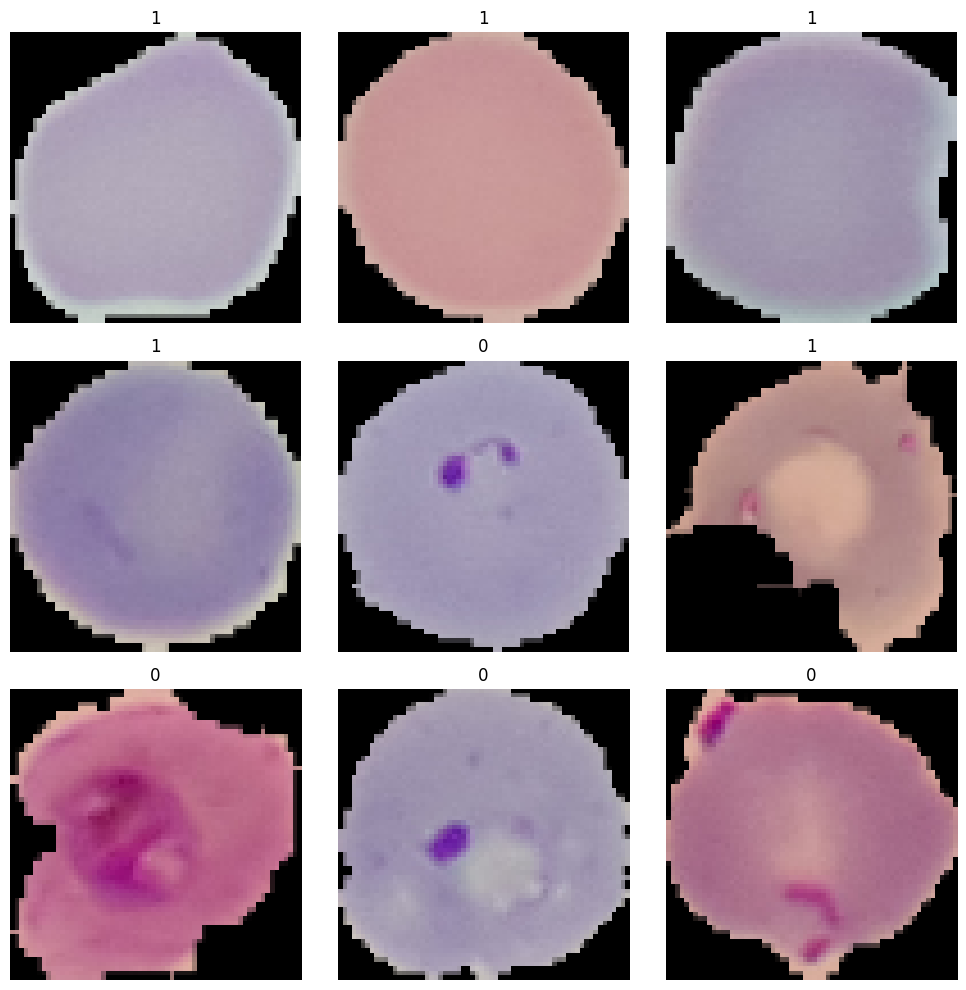

In [10]:
# Show a batch of images and labels
import matplotlib.pyplot as plt

# train_ds is divided into batches. If I use take(1),
# it is like taking a whole batch (32 images) but we taken only 9 from it
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(str(labels[i].numpy()))
        plt.axis("off")

plt.tight_layout()
plt.show()

# Parse data

(32, 64, 64, 3) (32,)
cell_shape: (64, 64, 3)
just_img: (64, 64)
['Parasitized', 'Uninfected']


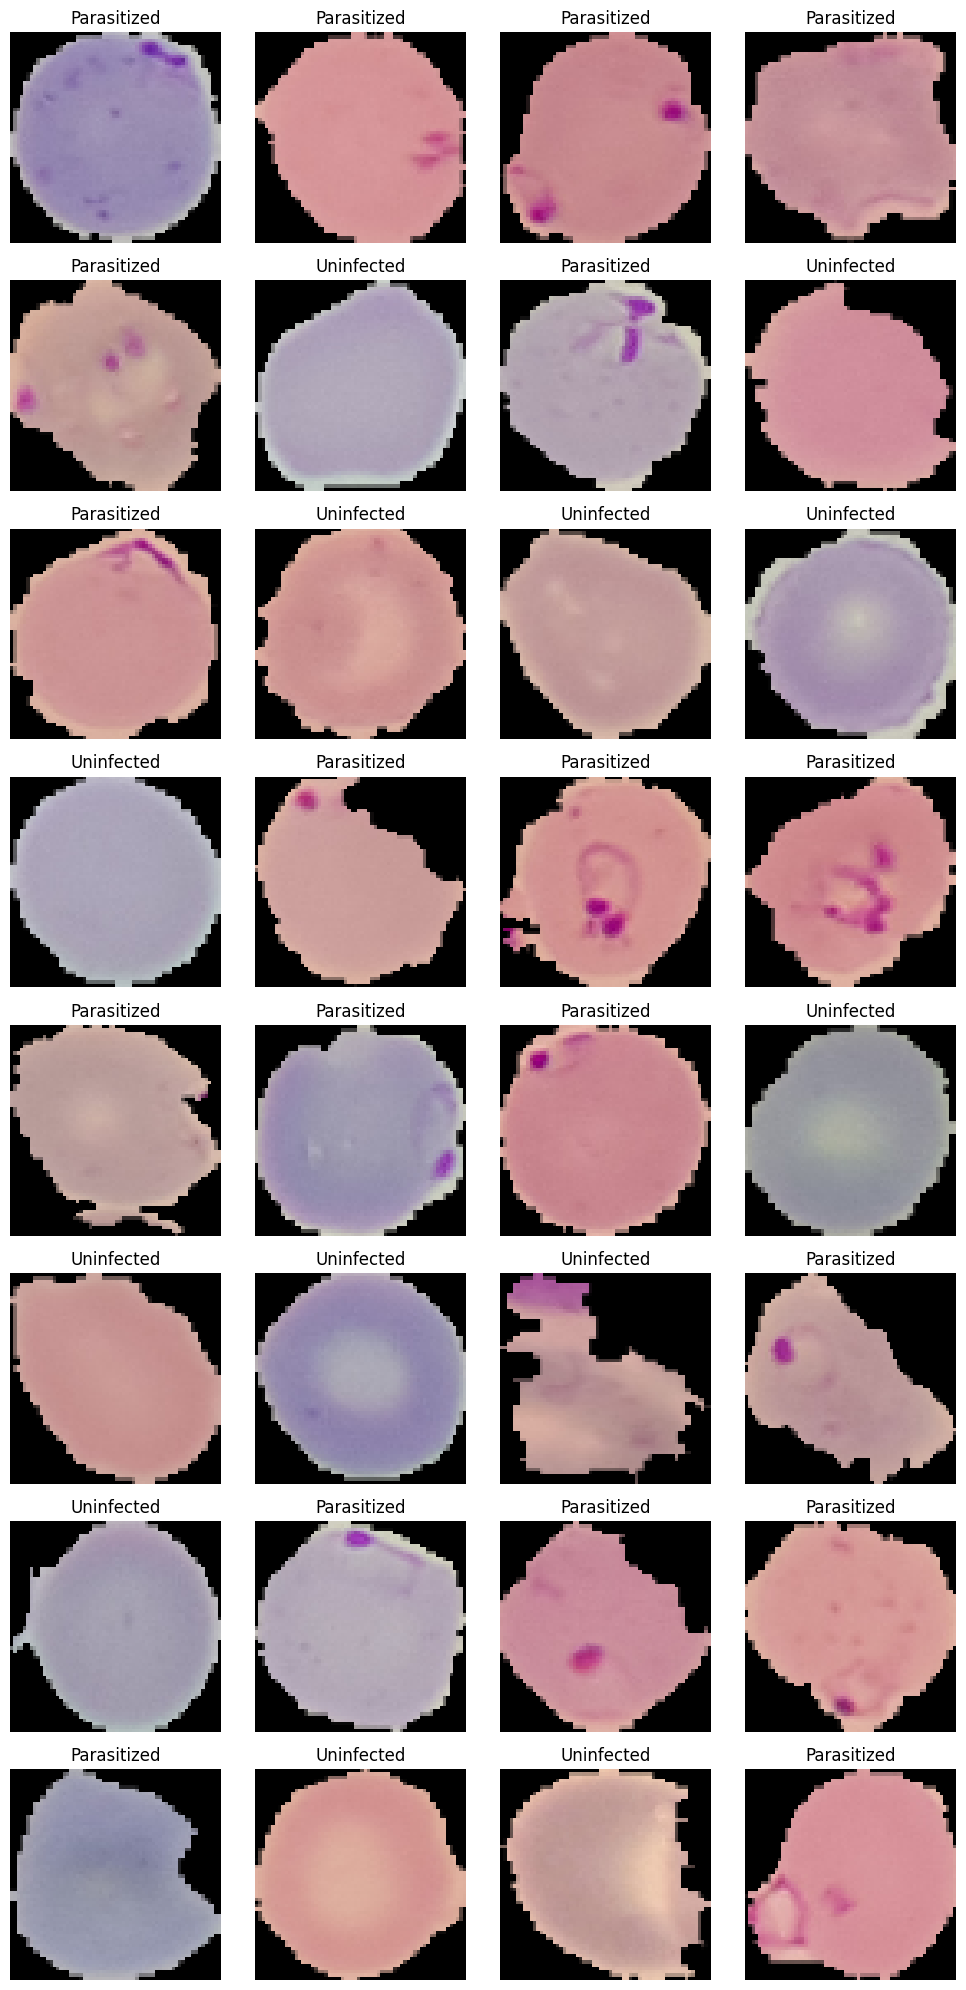

In [11]:
#Inspect Tensors

train_ds, val_ds

for img, lbl in train_ds.take(1):
  print (img.shape, lbl.shape)

# save cell_shape and just_image
cell_shape, just_img = img.shape[1:],img.shape[1:3]
print(f'cell_shape: {cell_shape}')
print(f'just_img: {just_img}')

# Check the class names
class_names = train_ds.class_names
print(class_names)

#Display images from a batch in memory
plt.figure(figsize=(10, 20))
for images, labels in train_ds.take(1):
  for i in range(32):
    ax = plt.subplot(8, 4, i + 1)
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')

plt.tight_layout()
plt.show()

## Normalizar datos

In [12]:
def format_image(image, label):
  image = tf.image.resize(image, just_img) / 255.0
  return image, label

## Pipeline

In [13]:
#Initialize parameters, shuffle training data, and batch and prefetch training and test data:
shuffle_size = 100

train_cds = train_ds.map(format_image).\
                        shuffle(shuffle_size).cache().prefetch(1)
val_cds = val_ds.map(format_image).\
                        cache().prefetch(1)

#Inspect tensors (normalization)

import numpy as np

# Collect images into lists
train_images_list = []
val_images_list = []

# Append images to the lists
for x, _ in train_cds:
    train_images_list.append(x.numpy())

for x, _ in val_cds:
    val_images_list.append(x.numpy())

# Convert lists to NumPy arrays
train_images = np.concatenate(train_images_list, axis=0)
val_images = np.concatenate(val_images_list, axis=0)

# Find and print min and max values
print("Training dataset - min value:", train_images.min(), "max value:", train_images.max())
print("Test dataset - min value:", val_images.min(), "max value:", val_images.max())

Training dataset - min value: 0.0 max value: 1.0
Test dataset - min value: 0.0 max value: 1.0


# CNN

In [14]:
#Import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout, Activation, GlobalAveragePooling2D
from tensorflow.keras import regularizers


#Get the number of classes for use in the model
num_classes = len(class_names)
num_classes

cell_model = Sequential([
    Input(shape=cell_shape),  # Input volume: (batch_size, 64, 64, 3)

    # Primera capa convolucional
    Conv2D(32, 3, activation=None, kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),

    # Segunda capa convolucional
    Conv2D(64, 3, activation=None, kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),

    # Tercera capa convolucional
    Conv2D(128, 3, activation=None, kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D(),

    # Global Average Pooling para reducir parámetros
    GlobalAveragePooling2D(),

    # Capas densas
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.5),  # Regularización
    Dense(num_classes, activation='softmax')  # Predicciones finales
])

# Compilar el modelo
cell_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Optimizador Adam con tasa de aprendizaje baja
    loss='sparse_categorical_crossentropy',  # Pérdida para clasificación multiclase
    metrics=['accuracy']  # Métrica de evaluación
)

# Resumen del modelo
cell_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 62, 62, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 29, 29, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 29, 29, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 128)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,914 (433.26 KB)

 Trainable params: 110,466 (431.51 KB)

 Non-trainable params: 448 (1.75 KB)

# Entrenar el modelo

In [15]:
import tensorflow as tf

# Función para aplicar aumentos de datos
def data_augmentation(image, label):
    image = tf.image.resize(image, [64, 64])  # Asegurarse de que la imagen tiene el tamaño correcto
    image = tf.image.random_flip_left_right(image)  # Flip aleatorio horizontal
    image = tf.image.random_flip_up_down(image)  # Flip aleatorio vertical
    image = tf.image.random_brightness(image, max_delta=0.2)  # Variación aleatoria de brillo
    image = tf.image.random_contrast(image, lower=0.7, upper=1.3)  # Contraste aleatorio

    return image, label

# Aplicar aumento de datos al conjunto de entrenamiento usando tf.data
train_cds = train_cds.map(data_augmentation, num_parallel_calls=tf.data.AUTOTUNE)

In [16]:
# Entrenar el modelo
history = cell_model.fit(
    train_cds,
    validation_data=val_cds,
    epochs=30,
    batch_size=32
)

Epoch 1/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 22s 20ms/step - accuracy: 0.6911 - loss: 2.8874 - val_accuracy: 0.8586 - val_loss: 1.7967
Epoch 2/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.8966 - loss: 1.5762 - val_accuracy: 0.9303 - val_loss: 1.1126
Epoch 3/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9233 - loss: 1.0528 - val_accuracy: 0.9323 - val_loss: 0.8132
Epoch 4/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.9325 - loss: 0.7730 - val_accuracy: 0.9483 - val_loss: 0.6180
Epoch 5/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9419 - loss: 0.6002 - val_accuracy: 0.9423 - val_loss: 0.5061
Epoch 6/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9450 - loss: 0.4902 - val_accuracy: 0.9418 - val_loss: 0.4309
Epoch 7/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9477 - loss: 0.4101 - val_accuracy: 0.9343 - val_loss: 0.3876
Epoch 8/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9455 - loss: 0.3589 - val_accuracy:

# Fine turning

In [17]:
# Descongelar las últimas capas del modelo base
cell_model.trainable = True

# Opcional: congela capas iniciales para evitar sobreajuste
for layer in cell_model.layers[:10]:
    layer.trainable = False

# Recompilar con un learning rate más bajo
cell_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Entrenar con fine-tuning
history_fine_tuning = cell_model.fit(
    train_cds,
    validation_data=val_cds,
    epochs=30,
    batch_size=32
)

Epoch 1/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9246 - loss: 0.2251 - val_accuracy: 0.9584 - val_loss: 0.1367
Epoch 2/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9484 - loss: 0.1649 - val_accuracy: 0.9579 - val_loss: 0.1362
Epoch 3/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9529 - loss: 0.1524 - val_accuracy: 0.9575 - val_loss: 0.1368
Epoch 4/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9562 - loss: 0.1447 - val_accuracy: 0.9574 - val_loss: 0.1373
Epoch 5/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9548 - loss: 0.1457 - val_accuracy: 0.9570 - val_loss: 0.1371
Epoch 6/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9564 - loss: 0.1447 - val_accuracy: 0.9572 - val_loss: 0.1374
Epoch 7/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9576 - loss: 0.1446 - val_accuracy: 0.9568 - val_loss: 0.1371
Epoch 8/30
689/689 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9544 - loss: 0.1468 - val_accuracy: 0

# Enseñar métricas

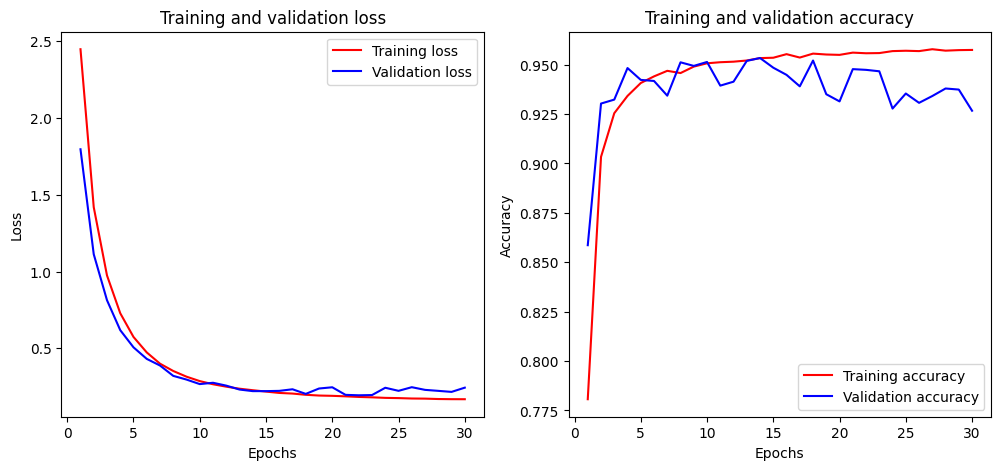

In [18]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

# Plot the loss
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot the accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Evaluar modelo

Validation Loss: 0.13521282374858856
Validation Accuracy: 0.9573580026626587


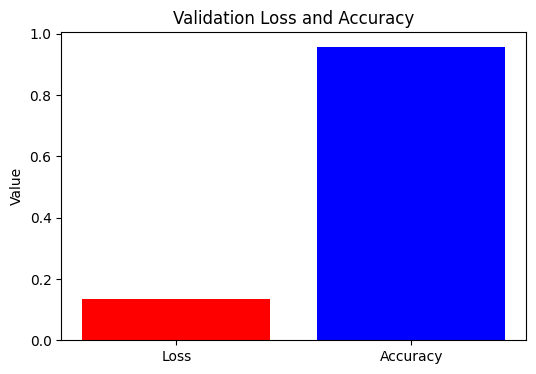

In [19]:
import matplotlib.pyplot as plt

# Evaluar el modelo en el conjunto de validación (en lugar de test set, ya que no se ha definido un conjunto de test)
val_loss, val_accuracy = cell_model.evaluate(val_cds, verbose=0)

# Imprimir la pérdida y la precisión en el conjunto de validación
print("Validation Loss:", val_loss)
print("Validation Accuracy:", val_accuracy)

# Graficar los resultados
plt.figure(figsize=(6, 4))
plt.bar(['Loss', 'Accuracy'], [val_loss, val_accuracy], color=['red', 'blue'])
plt.title('Validation Loss and Accuracy')
plt.ylabel('Value')
plt.show()

## Matriz de confusion

173/173 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Length of y_true: 5511
Length of y_pred_classes: 5511


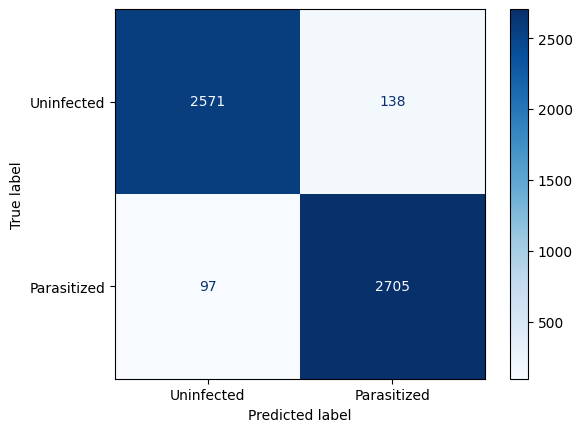

In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Realizar predicciones en el conjunto de validación
y_pred = cell_model.predict(val_cds)
y_pred_classes = np.argmax(y_pred, axis=1)

# Obtener las etiquetas verdaderas
y_true = np.concatenate([y.numpy() for x, y in val_cds], axis=0)

print("Length of y_true:", len(y_true))
print("Length of y_pred_classes:", len(y_pred_classes))

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Mostrar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=['Uninfected', 'Parasitized'])
disp.plot(cmap=plt.cm.Blues)
plt.show()

## Curva de ROC

173/173 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


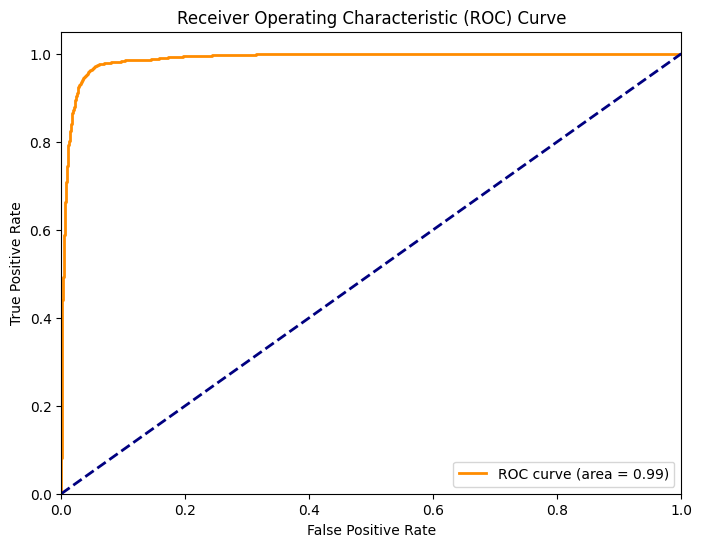

AUC: 0.99


In [21]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Obtener las probabilidades de las predicciones para la clase positiva (Parasitized)
y_pred = cell_model.predict(val_cds)
y_pred_prob = y_pred[:, 1]  # Probabilidades para la clase positiva (Parasitized)

# Obtener las etiquetas verdaderas y binarizarlas (0 = Uninfected, 1 = Parasitized)
y_true = np.concatenate([y.numpy() for x, y in val_cds], axis=0)
y_true_bin = label_binarize(y_true, classes=[0, 1])  # Binariza las etiquetas

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_true_bin, y_pred_prob)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Línea diagonal (clasificador aleatorio)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Imprimir el AUC
print(f'AUC: {roc_auc:.2f}')